# lesson5 練習問題解答

## 5-0. 準備

必要なライブラリをインストールしておきます。

In [4]:
%%bash
pip install -U pip
pip install japanize_matplotlib

matplotlibで使用するデータセットをダウンロードします。<br>
使用するデータはワインの品質に関する統計データです。<br>
https://archive.ics.uci.edu/ml/datasets/wine

今回は白ワインのデータを使用します。

In [5]:
%%bash

wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

各列のデータは以下のような値を表しています。


||列名|説明|
|--|--|--|
|1|fixed acidity|酸性度|
|2|volatile acidity|揮発性酸性度|
|3|citric acid|クエン酸|
|4|residual sugar|残留糖|
|5|chlorides|塩化物|
|6|free sulfur dioxide|遊離二酸化硫黄|
|7|total sulfur dioxide|総二酸化硫黄|
|8|dencity|密度|
|9|pH|pH|
|10|sulphates|硫酸塩|
|11|alcohol|アルコール|
|12|quality|品質(0:悪い-10:良い)|

しかし、ダウンロードしたcsvファイルは区切り文字が";"になっているためdefaultではpandasで読み込めません。

## 5-1. データの読み込み

ダウンロードしたcsvファイルをpandasのデータフレームに格納してください。<br>
アプローチとしては以下の2通り考えられますが、どちらでも構いません。<br>

- 区切り文字";"を","に置換した新たなcsvファイルを作成し、pandasから読み込む
- csvファイルそのものを変更せず、pandasから読み込む際に区切り文字に","ではなく";"を指定する。

In [6]:
import pandas as pd

In [7]:
# 別のcsvファイルを作成して読み込む方法
csv_document = []
with open("./winequality-white.csv", "r") as f:
    document = f.read().split("\n")
    for l in document:
        csv_document.append(l.replace(";", ","))

with open("./winequality-white-formatted.csv", "w") as f:
    f.write("\n".join(csv_document))
    
df = pd.read_csv("./winequality-white-formatted.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
# pandas側で区切り文字を変更する方法(sep=";"で変更可能)

df = pd.read_csv("./winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 5-2. データの可視化

1. x軸にdensity(密度)を、y軸にalcohol(アルコール度数)をとった散布図を作成してください。ただし、x軸,y軸には軸ラベルを付けタイトルも表示してください。
2. 1.で作成したグラフの**右隣**に、x軸にcitric acid(クエン酸)を、y軸にpHをとった散布図を作成してください。
3. quality(品質)について各値が全体に対してどの程度の割合を占めているかわかるようなグラフを作成してください。(ヒストグラムや円グラフ等)

In [10]:
import matplotlib.pyplot as plt
import japanize_matplotlib

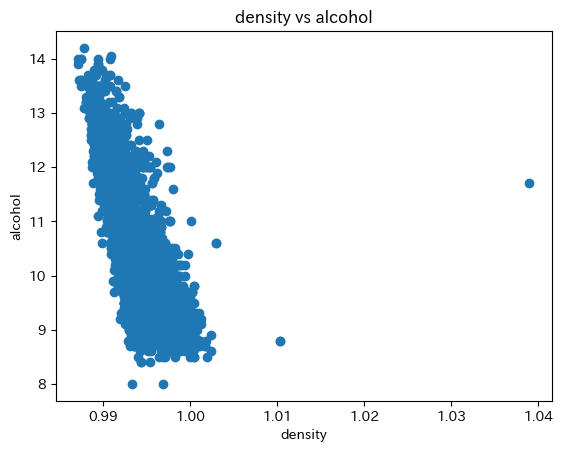

In [11]:
# 1.解答

plt.scatter(df["density"], df["alcohol"])
plt.xlabel("density")
plt.ylabel("alcohol")
plt.title("density vs alcohol")
plt.show()

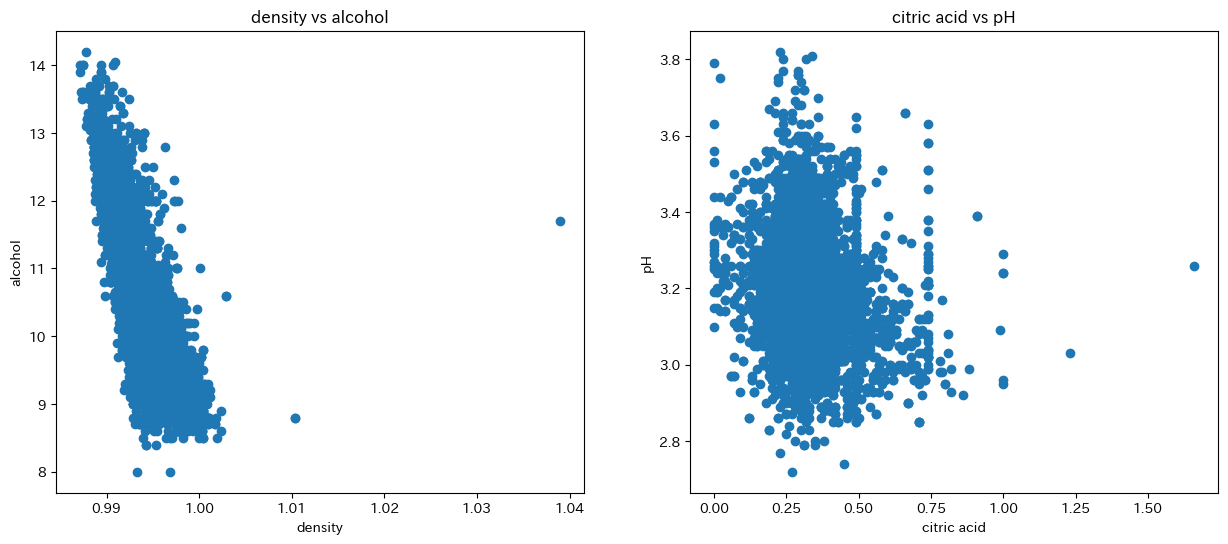

In [12]:
# 2.解答

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(df["density"], df["alcohol"])
ax.set_xlabel("density")
ax.set_ylabel("alcohol")
ax.set_title("density vs alcohol")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(df["citric acid"], df["pH"])
ax.set_xlabel("citric acid")
ax.set_ylabel("pH")
ax.set_title("citric acid vs pH")
fig.show()

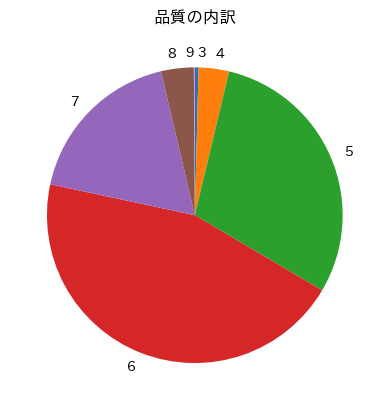

In [13]:
# 3. 円グラフ

quality_size = df.groupby("quality").size()

plt.pie(
    quality_size,
    labels = quality_size.index,
    startangle=90, 
    counterclock=False       
)
plt.title("品質の内訳")
plt.show()

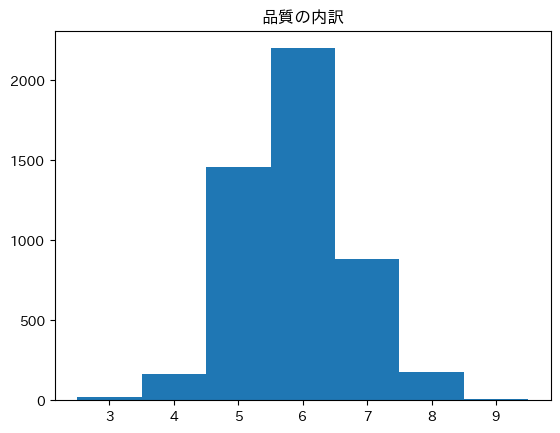

In [14]:
# 3.ヒストグラム

plt.hist(df["quality"], bins=[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])
plt.title("品質の内訳")
plt.show()